# Is the score difference correlated with any variable
Here we introduce new variable score_diff = left_score - right_score.
The distribution of the score difference is unimodal centered near 0.

### Questions
- Is the person with leading score more likely to initiate? 
    - use general score difference (left - right)
    - H_e: if score_diff is large (left lead), more likely to have left initiation

### TODO: 
- **get numerical count(nonbinary) of scoring, plot that against initiation**
- test interactions between variables
- use stratified by who scored data
- debug attack location: coefficient too big wtf 

### back burner questions: 
-

In [13]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
# load data
touches = pd.read_csv('data/saber.csv')
# remove unnecessary columns: weapon_y, created_date, tournament_id, gfycat_gfy_id, fotl_name, fotr_name, download_url
touches=touches.drop(columns=['weapon_y', 'stats_id', 'created_date', 'tournament_id', 'gfycat_gfy_id', 
                              'fotl_name', 'fotr_name', 'download_url'])
touches_binary = pd.get_dummies(touches, prefix=['init', 'touch', 'stp_loc', 'bod_loc', 'gender'], 
                         columns=['initiated', 'touch', 'strip_location', 'body_location', 'gender'])

# get pre touch score difference 
touches_binary['left_score_pre'] = touches_binary.left_score - touches_binary.touch_left
touches_binary['right_score_pre'] = touches_binary.right_score - touches_binary.touch_right

# get numerical initialization count
touches_binary['init_num'] = touches_binary.init_fotl + touches_binary.init_fotr*-1

# get score difference column 'score_diff' and score difference column from scorer perspective 'scorer_lead'
touches_binary['score_diff_pre'] = touches_binary['left_score_pre'] - touches_binary['right_score_pre']
touches_binary['score_diff_post'] = touches_binary['left_score'] - touches_binary['right_score']
touches_binary['scorer_lead'] = touches_binary['score_diff_pre']
touches_binary.loc[touches_binary.touch_right == 1, 'scorer_lead'] = touches_binary.loc[touches_binary.touch_right == 1, 'scorer_lead']*-1

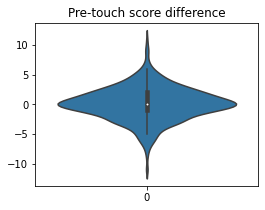

In [23]:
plt.figure(figsize=(4, 3))
sb.violinplot(touches_binary['score_diff_pre'])
plt.title('Pre-touch score difference')
plt.show()

In [9]:
# further stratify by who scored the touch, this block is currently not in use
touches_bin_left_scr = touches_binary.loc[touches_binary['touch_left']==1]
touches_bin_right_scr = touches_binary.loc[touches_binary['touch_right']==1]

## Does attack initation relate to score difference
Variables involved: init_fotl, init_fotr, init_neither, score_diff

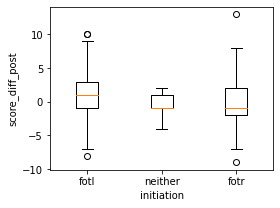

left initiation: mean =  0.910958904109589 standard dev =  3.5052235636529434
neither initiation: mean =  -0.6923076923076923 standard dev =  1.7269187938956652
right initiation: mean =  -0.25 standard dev =  3.4360657180920766


In [37]:
# specify which variable we are using as dependent variable, e.g. score_diff (left lead) or scorer_lead (scorer lead duh.)
df = touches_binary.copy()

# change dep_var to use different type of score difference as the dependent varaible (y-axis)
dep_var = 'score_diff_post'

plt.figure(figsize=(4, 3))
B = plt.boxplot([df[dep_var].loc[df['init_fotl']==1],
             df[dep_var].loc[df['init_neither']==1],
             df[dep_var].loc[df['init_fotr']==1]],
           labels=['fotl', 'neither', 'fotr'])
plt.ylabel(dep_var)
plt.xlabel('initiation')
plt.show()

column_data=df[dep_var].loc[df['init_fotl']==1]
mean = np.average(column_data)
std = np.std(column_data)
print('left initiation: mean = ', mean, 'standard dev = ', std)

column_data=df[dep_var].loc[df['init_neither']==1]
mean = np.average(column_data)
std = np.std(column_data)
print('neither initiation: mean = ', mean, 'standard dev = ', std)

column_data=df[dep_var].loc[df['init_fotr']==1]
mean = np.average(column_data)
std = np.std(column_data)
print('right initiation: mean = ', mean, 'standard dev = ', std)

# ^

Score difference (pre or post) are calculated by left - right score. Positive value indicates a left fencer lead and negative value indicates a right fencer lead. 

### Pre-touch score difference

Foil: 
<br>left initiation: mean =  0.20333102012491325 standard dev =  3.6474991205228156
<br>neither initiation: mean =  -0.2523076923076923 standard dev =  4.133655774150963
<br>right initiation: mean =  0.1204906204906205 standard dev =  3.7875468142852893

Sabre: 
<br>left initiation: mean =  0.6164383561643836 standard dev =  3.339797947240494
<br>neither initiation: mean =  -0.3076923076923077 standard dev =  1.635407048113023
<br>right initiation: mean =  -0.03571428571428571 standard dev =  3.3002396326104964

Epee: 
<br>left initiation: mean =  -0.16408668730650156 standard dev =  2.72262814978853
<br>neither initiation: mean =  0.9 standard dev =  3.505709628591621
<br>right initiation: mean =  0.41297935103244837 standard dev =  2.7695046525006215

========================================================================================
### Post_touch score difference 

foil
<br>left initiation: mean =  0.46564885496183206 standard dev =  3.7914537025487807
<br>neither initiation: mean =  -0.2553846153846154 standard dev =  4.443769389891035
<br>right initiation: mean =  -0.09668109668109669 standard dev =  3.9903423033273064

sabre
<br>left initiation: mean =  0.910958904109589 standard dev =  3.5052235636529434
<br>neither initiation: mean =  -0.6923076923076923 standard dev =  1.7269187938956652
<br>right initiation: mean =  -0.25 standard dev =  3.4360657180920766

epee
<br>left initiation: mean =  0.006191950464396285 standard dev =  2.916796461501889
<br>neither initiation: mean =  1.0 standard dev =  3.9496835316262997
<br>right initiation: mean =  0.36578171091445427 standard dev =  3.0194272972017955


In [97]:
X_data = df[['init_fotl', 'init_fotr', 'init_neither']]

X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    df[dep_var], shuffle=True, random_state=404, test_size=0.2)
reg = LinearRegression(copy_X=True, fit_intercept=True)
reg.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("coefficients", reg.coef_)
y_pred=reg.predict(X_test)
print("the mse on test set is", np.sum(np.power(y_test-y_pred, 2))/len(y_test))

intercept 0.43594009983361204
coefficients [-0.20974962 -0.14166217  0.3480599 ]
the mse on test set is 13.862439177233044


# ^
This linear regression looks really **useless**.

In [55]:
#group touches by left/right lead

df_left_lead = df.loc[df['score_diff_pre'] > 0]
df_right_lead = df.loc[df['score_diff_pre'] < 0]
n_left_lead = len(df_left_lead)
n_right_lead = len(df_right_lead)

print('Of all touches before which left fencer was leading:') 
print('proportion next point initiated by left fencer', len(df_left_lead.loc[df_left_lead['init_fotl'] == 1])/n_left_lead)
print('proportion next point initiated by right fencer', len(df_left_lead.loc[df_left_lead['init_fotr'] == 1])/n_left_lead)

print('Of all touches before which right fencer was leading:')
print('proportion next point initiated by left fencer', len(df_right_lead.loc[df_right_lead['init_fotl'] == 1])/n_right_lead)
print('proportion next point initiated by right fencer', len(df_right_lead.loc[df_right_lead['init_fotr'] == 1])/n_right_lead)


Of all touches before which left fencer was leading:
proportion next point initiated by left fencer 0.4965986394557823
proportion next point initiated by right fencer 0.42857142857142855
Of all touches before which right fencer was leading:
proportion next point initiated by left fencer 0.3684210526315789
proportion next point initiated by right fencer 0.5263157894736842


# >>>> YOU ARE HERE

proportion bar doesn't require binary. do not use one hot encoding here. 

want: given left is leading, what proportions of the next point is initiated by left/neither/right fencer.
- visualization: two proportion bar graphs, one for left lead one for right lead
- three bars by weapon, vertically stack left/neither/right

In [187]:
# load data
df = pd.read_csv('data/fencing-touches-combine.csv')
# remove unnecessary columns: weapon_y, created_date, tournament_id, gfycat_gfy_id, fotl_name, fotr_name, download_url
df = df.drop(columns=['weapon_y', 'stats_id', 'created_date', 'tournament_id', 'gfycat_gfy_id', 
                              'fotl_name', 'fotr_name', 'download_url', 'gender'])
df = df.dropna()
df = pd.get_dummies(df, prefix=['touch'], 
                         columns=['touch'])

# get pre touch score difference 
df['left_score_pre'] = df.left_score - df.touch_left
df['right_score_pre'] = df.right_score - df.touch_right

# get numerical initialization count
df['score_diff_pre'] = df['left_score_pre'] - df['right_score_pre']

df.loc[df['score_diff_pre']> 0, 'lead'] = 1
df.loc[df['score_diff_pre']< 0, 'lead'] = 0
df.loc[df['score_diff_pre']== 0, 'lead'] = -1
df = df.loc[df.initiated != 'neither']
df = df.loc[df.lead != -1]
df.initiated = df.initiated.map({'fotl': 1, 'fotr': 0})

In [185]:
print(len(df.loc[(df.weapon_x == 'foil') & (df.lead == 1) &(df.initiated == 1)])
      /len(df.loc[(df.weapon_x =='foil') & (df.initiated == 1)]))

0.47540983606557374


In [188]:
prop = ((df.groupby(['weapon_x', 'initiated']).lead.sum()
         /df.lead.sum()).unstack('weapon_x'))
print(prop)

weapon_x       epee      foil     sabre
initiated                              
0          0.364211  0.050526  0.132632
1          0.237895  0.061053  0.153684


In [189]:
prop = prop.div(prop.sum(axis=0),axis=1)
print(prop)

weapon_x       epee     foil     sabre
initiated                             
0          0.604895  0.45283  0.463235
1          0.395105  0.54717  0.536765



# v


### Does attack location relate to score difference
Variables involved: stp_loc_fotl_warning_box, stp_loc_fotl_half, stp_loc_middle, stp_loc_fotr_half, stp_loc_fotr_warning_box, score_diff

In [95]:
df = touches_binary.copy()
dep_var = 'scorer_lead'

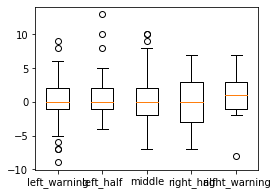

In [38]:
plt.figure(figsize=(4, 3))
plt.boxplot([df[dep_var].loc[df['stp_loc_fotl_warning_box']==1],
             df[dep_var].loc[df['stp_loc_fotl_half']==1],
             df[dep_var].loc[df['stp_loc_middle']==1],
             df[dep_var].loc[df['stp_loc_fotr_half']==1],
             df[dep_var].loc[df['stp_loc_fotr_warning_box']==1]],
           labels=['left_warning', 'left_half', 'middle', 'right_half', 'right_warning'])
plt.show()

In [62]:
X_data = df[['stp_loc_fotl_warning_box', 'stp_loc_fotl_half', 'stp_loc_middle', 
                         'stp_loc_fotr_half', 'stp_loc_fotr_warning_box']]

X_train, X_test, y_train, y_test = train_test_split(X_data, df[dep_var], 
                                                    shuffle=True, random_state=404, test_size=0.2)
reg = LinearRegression(copy_X=True, fit_intercept=True)
reg.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("coefficients", reg.coef_)
y_pred=reg.predict(X_test)
print("the mse on test set is", np.sum(np.power(y_test-y_pred, 2))/len(y_test))

intercept 1.3943661971830998
coefficients [-0.0576315  -0.33306352 -0.0283662  -0.28692818 -0.41023921]
the mse on test set is 13.948299087549806
